### fuente de datos
https://www.transportation.gov/policy/aviation-policy/us-international-air-passenger-and-freight-statistics-report

### configuracion inicial

---

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import ast

pd.set_option('display.max_columns', None) # show all columns

### vuelo de pasajeros

---

In [ ]:
dfVp = pd.read_csv('/content/drive/MyDrive/NoCountry|S14-27/International_Report_Departures_20240401.csv')

In [ ]:
# cambiar tipo de datos
dfVp.data_dte = pd.to_datetime(dfVp['data_dte'])

In [ ]:
dfVp.loc[dfVp[dfVp['airlineid']==20414].index, 'carrier'] = 'OW'

In [ ]:
dfVp.loc[dfVp[dfVp['airlineid']==20415].index, 'carrier'] = 'NA'

In [ ]:
dfVp.rename({'Year':'Año', 'Month':'Mes', 'usg_apt_id':'IDAeropuertoO', 'usg_apt':'AeropuertoO', 'fg_apt_id':'IDAeropuertoD', 'fg_apt':'AeropuertoD',	'airlineid':'IDAerolinea', 'carrier':'Aerolinea', 'carriergroup':'TipoAerolinea', 'type':'TablaOrigen', 'Scheduled':'VPasajerosC', 'Charter':'VPasajerosP'},axis=1, inplace=True)

In [ ]:
dfVp = dfVp[['Año','Mes','IDAeropuertoO','AeropuertoO','IDAeropuertoD','AeropuertoD','IDAerolinea','Aerolinea','TipoAerolinea','TablaOrigen','VPasajerosC','VPasajerosP']]

In [ ]:
dfVp['TablaOrigen'] = 'VueloPasajeros'

In [ ]:
dfVp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1051292 entries, 0 to 1051291
Data columns (total 12 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Año            1051292 non-null  int64 
 1   Mes            1051292 non-null  int64 
 2   IDAeropuertoO  1051292 non-null  int64 
 3   AeropuertoO    1051292 non-null  object
 4   IDAeropuertoD  1051292 non-null  int64 
 5   AeropuertoD    1051292 non-null  object
 6   IDAerolinea    1051292 non-null  int64 
 7   Aerolinea      1051292 non-null  object
 8   TipoAerolinea  1051292 non-null  int64 
 9   TablaOrigen    1051292 non-null  object
 10  VPasajerosC    1051292 non-null  int64 
 11  VPasajerosP    1051292 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 96.2+ MB


In [ ]:
dfVp.head()

,Año,Mes,IDAeropuertoO,AeropuertoO,IDAeropuertoD,AeropuertoD,IDAerolinea,Aerolinea,TipoAerolinea,TablaOrigen,VPasajerosC,VPasajerosP
0,2006,5,12016,GUM,13162,MAJ,20177,PFQ,1,VueloPasajeros,0,10
1,2009,4,10397,ATL,16321,ZRH,19790,DL,1,VueloPasajeros,54,0
2,2003,5,10299,ANC,13856,OKO,20007,5Y,1,VueloPasajeros,0,15
3,2005,2,11057,CLT,14849,SKB,20355,US,1,VueloPasajeros,8,0
4,2004,1,12478,JFK,11625,EZE,19535,AR,0,VueloPasajeros,30,0


In [ ]:
#dfVp.to_csv('VueloPasajeros.csv', index=False)

### vuelo de carga

---

In [ ]:
dfVc = pd.read_csv('/content/drive/MyDrive/NoCountry|S14-27/International_Report_Freight_20240402.csv')

In [ ]:
# cambiar tipo de datos
dfVc.data_dte = pd.to_datetime(dfVc['data_dte'])

In [ ]:
dfVc.loc[dfVc[dfVc['airlineid']==20414].index, 'carrier'] = 'OW'

In [ ]:
dfVc.loc[dfVc[dfVc['airlineid']==20415].index, 'carrier'] = 'NA'

In [ ]:
dfVc.rename({'Year':'Año', 'Month':'Mes', 'usg_apt_id':'IDAeropuertoO', 'usg_apt':'AeropuertoO', 'fg_apt_id':'IDAeropuertoD', 'fg_apt':'AeropuertoD',	'airlineid':'IDAerolinea', 'carrier':'Aerolinea', 'carriergroup':'TipoAerolinea', 'type':'TablaOrigen', 'Scheduled':'VCargaC', 'Charter':'VCargaP'},axis=1, inplace=True)

In [ ]:
dfVc = dfVc[['Año','Mes','IDAeropuertoO','AeropuertoO','IDAeropuertoD','AeropuertoD','IDAerolinea','Aerolinea','TipoAerolinea','TablaOrigen','VCargaC','VCargaP']]

In [ ]:
dfVc['TablaOrigen'] = 'VueloCarga'

In [ ]:
dfVc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625560 entries, 0 to 625559
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Año            625560 non-null  int64 
 1   Mes            625560 non-null  int64 
 2   IDAeropuertoO  625560 non-null  int64 
 3   AeropuertoO    625560 non-null  object
 4   IDAeropuertoD  625560 non-null  int64 
 5   AeropuertoD    625560 non-null  object
 6   IDAerolinea    625560 non-null  int64 
 7   Aerolinea      625560 non-null  object
 8   TipoAerolinea  625560 non-null  int64 
 9   TablaOrigen    625560 non-null  object
 10  VCargaC        625560 non-null  int64 
 11  VCargaP        625560 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 57.3+ MB


In [ ]:
dfVc.head()

,Año,Mes,IDAeropuertoO,AeropuertoO,IDAeropuertoD,AeropuertoD,IDAerolinea,Aerolinea,TipoAerolinea,TablaOrigen,VCargaC,VCargaP
0,2008,5,13930,ORD,16217,YUL,19531,AC,0,VueloCarga,3,0
1,2005,6,13303,MIA,14739,SDQ,20400,PT,1,VueloCarga,0,21
2,2006,9,13204,MCO,12972,LHR,19540,BA,0,VueloCarga,15,0
3,2004,8,13487,MSP,10292,AMS,19386,NW,1,VueloCarga,479,0
4,2004,3,12478,JFK,16321,ZRH,19805,AA,1,VueloCarga,687,0


In [ ]:
#dfVc.to_csv('VueloCarga.csv', index=False)

### pasajeros

---

In [ ]:
dfP = pd.read_csv('/content/drive/MyDrive/NoCountry|S14-27/International_Report_Passengers_20240402.csv')

In [ ]:
# cambiar tipo de datos
dfP.data_dte = pd.to_datetime(dfP['data_dte'])

In [ ]:
dfP.loc[dfP[dfP['airlineid']==20414].index, 'carrier'] = 'OW'

In [ ]:
dfP.loc[dfP[dfP['airlineid']==20415].index, 'carrier'] = 'NA'

In [ ]:
dfP.rename({'Year':'Año', 'Month':'Mes', 'usg_apt_id':'IDAeropuertoO', 'usg_apt':'AeropuertoO', 'fg_apt_id':'IDAeropuertoD', 'fg_apt':'AeropuertoD',	'airlineid':'IDAerolinea', 'carrier':'Aerolinea', 'carriergroup':'TipoAerolinea', 'type':'TablaOrigen', 'Scheduled':'PasajerosC', 'Charter':'PasajerosP'},axis=1, inplace=True)

In [ ]:
dfP = dfP[['Año','Mes','IDAeropuertoO','AeropuertoO','IDAeropuertoD','AeropuertoD','IDAerolinea','Aerolinea','TipoAerolinea','TablaOrigen','PasajerosC','PasajerosP']]

In [ ]:
dfP['TablaOrigen'] = 'Pasajeros'

In [ ]:
dfP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766693 entries, 0 to 766692
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Año            766693 non-null  int64 
 1   Mes            766693 non-null  int64 
 2   IDAeropuertoO  766693 non-null  int64 
 3   AeropuertoO    766693 non-null  object
 4   IDAeropuertoD  766693 non-null  int64 
 5   AeropuertoD    766693 non-null  object
 6   IDAerolinea    766693 non-null  int64 
 7   Aerolinea      766693 non-null  object
 8   TipoAerolinea  766693 non-null  int64 
 9   TablaOrigen    766693 non-null  object
 10  PasajerosC     766693 non-null  int64 
 11  PasajerosP     766693 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 70.2+ MB


In [ ]:
dfP.head()

,Año,Mes,IDAeropuertoO,AeropuertoO,IDAeropuertoD,AeropuertoD,IDAerolinea,Aerolinea,TipoAerolinea,TablaOrigen,PasajerosC,PasajerosP
0,2004,7,14747,SEA,16229,YVR,19687,QX,1,Pasajeros,19265,0
1,2008,11,11697,FLL,12010,GUA,20416,NK,1,Pasajeros,3099,0
2,2002,10,10257,ALB,16271,YYZ,20206,QK,0,Pasajeros,33,0
3,2007,3,12889,LAS,13165,MAN,19541,BD,0,Pasajeros,3815,0
4,2009,3,12892,LAX,13252,MEX,19534,AM,0,Pasajeros,17993,0


In [ ]:
#dfP.to_csv('Pasajeros.csv', index=False)

### asientos

---

In [ ]:
dfA = pd.read_csv('/content/drive/MyDrive/NoCountry|S14-27/International_Report_Seats_20240402.csv')

In [ ]:
# cambiar tipo de datos
dfA.data_dte = pd.to_datetime(dfA['data_dte'])

In [ ]:
dfA.loc[dfA[dfA['airlineid']==20414].index, 'carrier'] = 'OW'

In [ ]:
dfA.loc[dfA[dfA['airlineid']==20415].index, 'carrier'] = 'NA'

In [ ]:
dfA.rename({'Year':'Año', 'Month':'Mes', 'usg_apt_id':'IDAeropuertoO', 'usg_apt':'AeropuertoO', 'fg_apt_id':'IDAeropuertoD', 'fg_apt':'AeropuertoD',	'airlineid':'IDAerolinea', 'carrier':'Aerolinea', 'carriergroup':'TipoAerolinea', 'type':'TablaOrigen', 'Scheduled':'AsientosC', 'Charter':'AsientosP'},axis=1, inplace=True)

In [ ]:
dfA = dfA[['Año','Mes','IDAeropuertoO','AeropuertoO','IDAeropuertoD','AeropuertoD','IDAerolinea','Aerolinea','TipoAerolinea','TablaOrigen','AsientosC','AsientosP']]

In [ ]:
dfA['TablaOrigen']= 'Asientos'

In [ ]:
dfA.drop_duplicates(ignore_index=True, inplace=True)

In [ ]:
dfA[dfA.duplicated()]

,Año,Mes,IDAeropuertoO,AeropuertoO,IDAeropuertoD,AeropuertoD,IDAerolinea,Aerolinea,TipoAerolinea,TablaOrigen,AsientosC,AsientosP


In [ ]:
dfA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 789572 entries, 0 to 789571
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Año            789572 non-null  int64 
 1   Mes            789572 non-null  int64 
 2   IDAeropuertoO  789572 non-null  int64 
 3   AeropuertoO    789572 non-null  object
 4   IDAeropuertoD  789572 non-null  int64 
 5   AeropuertoD    789572 non-null  object
 6   IDAerolinea    789572 non-null  int64 
 7   Aerolinea      789572 non-null  object
 8   TipoAerolinea  789572 non-null  int64 
 9   TablaOrigen    789572 non-null  object
 10  AsientosC      789572 non-null  int64 
 11  AsientosP      789572 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 72.3+ MB


In [ ]:
dfA.head()

,Año,Mes,IDAeropuertoO,AeropuertoO,IDAeropuertoD,AeropuertoD,IDAerolinea,Aerolinea,TipoAerolinea,TablaOrigen,AsientosC,AsientosP
0,2010,4,12266,IAH,16304,ZIH,19704,CO,1,Asientos,2226,0
1,2004,6,14747,SEA,16263,YYJ,19687,QX,1,Asientos,16909,0
2,2006,4,12266,IAH,12010,GUA,19704,CO,1,Asientos,18289,0
3,2003,2,13303,MIA,12986,LIM,19552,LA,0,Asientos,212,0
4,2008,3,14771,SFO,11032,CUN,19930,AS,1,Asientos,5658,0


In [ ]:
#dfA.to_csv('Asientos.csv', index=False)

### aeropuerto

---

In [ ]:
dfAeropuertos = pd.read_csv('/content/drive/MyDrive/NoCountry|S14-27/aeropuertosID.csv', header=None)

In [ ]:
dfAeropuertos.rename({0:'IDAeropuerto', 1:'CiudadPais'},axis=1, inplace=True)

In [ ]:
dfAeropuertos[['Ciudad_Pais', 'NombreAeropuerto']] = dfAeropuertos.CiudadPais.str.split(":", expand=True)

In [ ]:
dfAeropuertos[['Ciudad', 'Pais']] = dfAeropuertos.Ciudad_Pais.str.split(", ", n=1, expand=True, regex=False)

In [ ]:
dfAeropuertos = dfAeropuertos[['IDAeropuerto', 'NombreAeropuerto', 'Ciudad', 'Pais']]

In [ ]:
# eliminar registro si todos sus valores son nulos
dfAeropuertos.dropna(axis=0, inplace=True)

In [ ]:
dfAeropuertos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6669 entries, 1 to 6669
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   IDAeropuerto      6669 non-null   object
 1   NombreAeropuerto  6669 non-null   object
 2   Ciudad            6669 non-null   object
 3   Pais              6669 non-null   object
dtypes: object(4)
memory usage: 260.5+ KB


In [ ]:
dfAeropuertos.sample(5)

,IDAeropuerto,NombreAeropuerto,Ciudad,Pais
4140,14308,Placerville Airport,Placerville,CA
5883,16191,Saint John Airport,Saint John,Canada
1173,11214,Coldfoot Airport,Coldfoot,AK
3778,13937,Ahmed Benbella,Oran,Algeria
4114,14282,Platinum Airport,Platinum,AK


In [ ]:
#dfAeropuertos.to_csv('Aeropuertos.csv', index=False)

### aerolinea

---

In [ ]:
#df= pd.read_csv('/content/drive/MyDrive/NoCountry|S14-27/aerolineas.csv')

In [ ]:
dfAerolineas = pd.read_csv('/content/drive/MyDrive/NoCountry|S14-27/aerolineasID.csv')

In [ ]:
dfAerolineas.rename({'Code':'IDAerolinea'},axis=1, inplace=True)

In [ ]:
dfAerolineas[['Nombre', 'Aerolinea']] = dfAerolineas.Description.str.split(": ", expand=True)

In [ ]:
dfAerolineas = dfAerolineas[['IDAerolinea', 'Aerolinea', 'Nombre']]

In [ ]:
dfAerolineas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1734 entries, 0 to 1733
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   IDAerolinea  1734 non-null   int64 
 1   Aerolinea    1734 non-null   object
 2   Nombre       1734 non-null   object
dtypes: int64(1), object(2)
memory usage: 40.8+ KB


In [ ]:
dfAerolineas.head()

,IDAerolinea,Aerolinea,Nombre
0,19031,MAC,Mackey International Inc.
1,19032,XY,Munz Northern Airlines Inc.
2,19033,COC,Cochise Airlines Inc.
3,19034,GSA,Golden Gate Airlines Inc.
4,19035,RZZ,Aeromech Inc.


In [ ]:
dfVpcAP2 = dfVpcAP[['IDAerolinea', 'TipoAerolinea']]

In [ ]:
dfVpcAP2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1051318 entries, 0 to 1051317
Data columns (total 2 columns):
 #   Column         Non-Null Count    Dtype
---  ------         --------------    -----
 0   IDAerolinea    1051318 non-null  int64
 1   TipoAerolinea  1051318 non-null  int64
dtypes: int64(2)
memory usage: 16.0 MB


In [ ]:
dfVpcAP2.head()

,IDAerolinea,TipoAerolinea
0,20177,1
1,19790,1
2,20007,1
3,20355,1
4,19535,0


In [ ]:
dfVpcAP2.drop_duplicates(ignore_index=True, inplace=True)

<ipython-input-136-29bcb151fb90>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfVpcAP2.drop_duplicates(ignore_index=True, inplace=True)


In [ ]:
dfVpcAP2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 749 entries, 0 to 748
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   IDAerolinea    749 non-null    int64
 1   TipoAerolinea  749 non-null    int64
dtypes: int64(2)
memory usage: 11.8 KB


In [ ]:
dfAA = dfVpcAP2.merge(dfAerolineas, on=['IDAerolinea'], how='outer')

In [ ]:
dfAA = dfAA[['IDAerolinea','Aerolinea','Nombre','TipoAerolinea']]

In [ ]:
dfAA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1734 entries, 0 to 1733
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   IDAerolinea    1734 non-null   int64  
 1   Aerolinea      1734 non-null   object 
 2   Nombre         1734 non-null   object 
 3   TipoAerolinea  749 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 54.3+ KB


In [ ]:
dfAA.head()

,IDAerolinea,Aerolinea,Nombre,TipoAerolinea
0,20177,PFQ,Asia Pacific,1.0
1,19790,DL,Delta Air Lines Inc.,1.0
2,20007,5Y,Atlas Air Inc.,1.0
3,20355,US (Merged with America West 9/05. Reporting f...,US Airways Inc.,1.0
4,19535,AR,Aerolineas Argentinas,0.0


In [ ]:
#dfAA.to_csv('Aerolineas.csv', index=False)

### estados USA

---

In [ ]:
dfEstados = pd.read_excel('/content/drive/MyDrive/NoCountry|S14-27/georef-united-states-of-america-state.xlsx')

In [ ]:
dfEstados.rename({'United States Postal Service state abbreviation':'IDEstado', 'Official Name State':'Estado'},axis=1, inplace=True)

In [ ]:
dfEstados = dfEstado[['IDEstado','Estado']]

In [ ]:
dfEstados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   IDEstado  56 non-null     object
 1   Estado    56 non-null     object
dtypes: object(2)
memory usage: 1.0+ KB


In [ ]:
dfEstados.head()

,IDEstado,Estado
0,WA,Washington
1,NM,New Mexico
2,MA,Massachusetts
3,UT,Utah
4,IA,Iowa


In [ ]:
#dfEstados.to_csv('EstadosUSA.csv', index=False)

### leer data transformada

---

In [ ]:
dfVp= pd.read_csv('/content/drive/MyDrive/NoCountry|S14-27/TablasTransformadas/VueloPasajeros.csv', keep_default_na=False)
dfVc= pd.read_csv('/content/drive/MyDrive/NoCountry|S14-27/TablasTransformadas/VueloCarga.csv', keep_default_na=False)
dfA= pd.read_csv('/content/drive/MyDrive/NoCountry|S14-27/TablasTransformadas/Asientos.csv', keep_default_na=False)
dfP= pd.read_csv('/content/drive/MyDrive/NoCountry|S14-27/TablasTransformadas/Pasajeros.csv', keep_default_na=False)
dfAeropuertos= pd.read_csv('/content/drive/MyDrive/NoCountry|S14-27/TablasTransformadas/Aeropuertos.csv', keep_default_na=False)

In [ ]:
dfAeropuertos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6669 entries, 0 to 6668
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   IDAeropuertoO     6669 non-null   int64 
 1   NombreAeropuerto  6669 non-null   object
 2   Ciudad            6669 non-null   object
 3   Pais              6669 non-null   object
dtypes: int64(1), object(3)
memory usage: 208.5+ KB


### merge

---

In [ ]:
dfVpc = dfVp.merge(dfVc, on=['Año','Mes','IDAeropuertoO','AeropuertoO','IDAeropuertoD','AeropuertoD','IDAerolinea','Aerolinea','TipoAerolinea'], how='outer')

In [ ]:
dfVpc.rename({'TablaOrigen_x':'TablaOrigenVP', 'TablaOrigen_y':'TablaOrigenVC'},axis=1, inplace=True)

In [ ]:
dfVpc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1051297 entries, 0 to 1051296
Data columns (total 15 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Año            1051297 non-null  int64  
 1   Mes            1051297 non-null  int64  
 2   IDAeropuertoO  1051297 non-null  int64  
 3   AeropuertoO    1051297 non-null  object 
 4   IDAeropuertoD  1051297 non-null  int64  
 5   AeropuertoD    1051297 non-null  object 
 6   IDAerolinea    1051297 non-null  int64  
 7   Aerolinea      1051297 non-null  object 
 8   TipoAerolinea  1051297 non-null  int64  
 9   TablaOrigenVP  1051292 non-null  object 
 10  VPasajerosC    1051292 non-null  float64
 11  VPasajerosP    1051292 non-null  float64
 12  TablaOrigenVC  625560 non-null   object 
 13  VCargaC        625560 non-null   float64
 14  VCargaP        625560 non-null   float64
dtypes: float64(4), int64(6), object(5)
memory usage: 120.3+ MB


In [ ]:
dfVpc.head()

,Año,Mes,IDAeropuertoO,AeropuertoO,IDAeropuertoD,AeropuertoD,IDAerolinea,Aerolinea,TipoAerolinea,TablaOrigenVP,VPasajerosC,VPasajerosP,TablaOrigenVC,VCargaC,VCargaP
0,2006,5,12016,GUM,13162,MAJ,20177,PFQ,1,VueloPasajeros,0.0,10.0,VueloCarga,0.0,16.0
1,2009,4,10397,ATL,16321,ZRH,19790,DL,1,VueloPasajeros,54.0,0.0,VueloCarga,280.0,0.0
2,2003,5,10299,ANC,13856,OKO,20007,5Y,1,VueloPasajeros,0.0,15.0,VueloCarga,0.0,762.0
3,2005,2,11057,CLT,14849,SKB,20355,US,1,VueloPasajeros,8.0,0.0,NaN,NaN,NaN
4,2004,1,12478,JFK,11625,EZE,19535,AR,0,VueloPasajeros,30.0,0.0,VueloCarga,181.0,0.0


In [ ]:
dfVpc[dfVpc.duplicated()]

,Año,Mes,IDAeropuertoO,AeropuertoO,IDAeropuertoD,AeropuertoD,IDAerolinea,Aerolinea,TipoAerolinea,TablaOrigenVP,VPasajerosC,VPasajerosP,TablaOrigenVC,VCargaC,VCargaP


In [ ]:
dfDif = pd.concat([dfVp, dfVpc]).drop_duplicates(subset=['Año','Mes','IDAeropuertoO','AeropuertoO','IDAeropuertoD','AeropuertoD','IDAerolinea','Aerolinea','TipoAerolinea'], keep=False)

In [ ]:
dfDif.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 1051292 to 1051296
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Año            5 non-null      int64  
 1   Mes            5 non-null      int64  
 2   IDAeropuertoO  5 non-null      int64  
 3   AeropuertoO    5 non-null      object 
 4   IDAeropuertoD  5 non-null      int64  
 5   AeropuertoD    5 non-null      object 
 6   IDAerolinea    5 non-null      int64  
 7   Aerolinea      5 non-null      object 
 8   TipoAerolinea  5 non-null      int64  
 9   TablaOrigen    0 non-null      object 
 10  VPasajerosC    0 non-null      float64
 11  VPasajerosP    0 non-null      float64
 12  TablaOrigenVP  0 non-null      object 
 13  TablaOrigenVC  5 non-null      object 
 14  VCargaC        5 non-null      float64
 15  VCargaP        5 non-null      float64
dtypes: float64(4), int64(6), object(6)
memory usage: 680.0+ bytes


In [ ]:
dfDif.head()

,Año,Mes,IDAeropuertoO,AeropuertoO,IDAeropuertoD,AeropuertoD,IDAerolinea,Aerolinea,TipoAerolinea,TablaOrigen,VPasajerosC,VPasajerosP,TablaOrigenVP,TablaOrigenVC,VCargaC,VCargaP
1051292,2007,4,13303,MIA,10911,CCS,20308,WE,1,NaN,NaN,NaN,NaN,VueloCarga,0.0,257.0
1051293,2001,7,12016,GUM,13162,MAJ,20177,PFQ,1,NaN,NaN,NaN,NaN,VueloCarga,0.0,23.0
1051294,1991,2,11905,GGG,11304,DHA,20042,SAQ,1,NaN,NaN,NaN,NaN,VueloCarga,0.0,73.0
1051295,1994,7,13303,MIA,15192,TGU,19658,TKQ,1,NaN,NaN,NaN,NaN,VueloCarga,0.0,12.0
1051296,2000,6,14107,PHX,11187,CUU,19874,8C,1,NaN,NaN,NaN,NaN,VueloCarga,0.0,10.0


----------

In [ ]:
dfAP = dfA.merge(dfP, on=['Año','Mes','IDAeropuertoO','AeropuertoO','IDAeropuertoD','AeropuertoD','IDAerolinea','Aerolinea','TipoAerolinea'], how='outer')

In [ ]:
dfAP.rename({'TablaOrigen_x':'TablaOrigenA', 'TablaOrigen_y':'TablaOrigenP'},axis=1, inplace=True)

In [ ]:
dfAP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 789828 entries, 0 to 789827
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Año            789828 non-null  int64  
 1   Mes            789828 non-null  int64  
 2   IDAeropuertoO  789828 non-null  int64  
 3   AeropuertoO    789828 non-null  object 
 4   IDAeropuertoD  789828 non-null  int64  
 5   AeropuertoD    789828 non-null  object 
 6   IDAerolinea    789828 non-null  int64  
 7   Aerolinea      789828 non-null  object 
 8   TipoAerolinea  789828 non-null  int64  
 9   TablaOrigenA   789572 non-null  object 
 10  AsientosC      789572 non-null  float64
 11  AsientosP      789572 non-null  float64
 12  TablaOrigenP   766693 non-null  object 
 13  PasajerosC     766693 non-null  float64
 14  PasajerosP     766693 non-null  float64
dtypes: float64(4), int64(6), object(5)
memory usage: 90.4+ MB


In [ ]:
dfAP.head()

,Año,Mes,IDAeropuertoO,AeropuertoO,IDAeropuertoD,AeropuertoD,IDAerolinea,Aerolinea,TipoAerolinea,TablaOrigenA,AsientosC,AsientosP,TablaOrigenP,PasajerosC,PasajerosP
0,2010,4,12266,IAH,16304,ZIH,19704,CO,1,Asientos,2226.0,0.0,Pasajeros,1662.0,0.0
1,2004,6,14747,SEA,16263,YYJ,19687,QX,1,Asientos,16909.0,0.0,Pasajeros,10635.0,0.0
2,2006,4,12266,IAH,12010,GUA,19704,CO,1,Asientos,18289.0,0.0,Pasajeros,15425.0,0.0
3,2003,2,13303,MIA,12986,LIM,19552,LA,0,Asientos,212.0,0.0,Pasajeros,154.0,0.0
4,2008,3,14771,SFO,11032,CUN,19930,AS,1,Asientos,5658.0,0.0,Pasajeros,4898.0,0.0


In [ ]:
dfAP[dfAP.duplicated()]

,Año,Mes,IDAeropuertoO,AeropuertoO,IDAeropuertoD,AeropuertoD,IDAerolinea,Aerolinea,TipoAerolinea,TablaOrigenA,AsientosC,AsientosP,TablaOrigenP,PasajerosC,PasajerosP


In [ ]:
dfDif2 = pd.concat([dfA, dfAP]).drop_duplicates(subset=['Año','Mes','IDAeropuertoO','AeropuertoO','IDAeropuertoD','AeropuertoD','IDAerolinea','Aerolinea','TipoAerolinea'], keep=False)

In [ ]:
dfDif2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 256 entries, 789572 to 789827
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Año            256 non-null    int64  
 1   Mes            256 non-null    int64  
 2   IDAeropuertoO  256 non-null    int64  
 3   AeropuertoO    256 non-null    object 
 4   IDAeropuertoD  256 non-null    int64  
 5   AeropuertoD    256 non-null    object 
 6   IDAerolinea    256 non-null    int64  
 7   Aerolinea      256 non-null    object 
 8   TipoAerolinea  256 non-null    int64  
 9   TablaOrigen    0 non-null      object 
 10  AsientosC      0 non-null      float64
 11  AsientosP      0 non-null      float64
 12  TablaOrigenA   0 non-null      object 
 13  TablaOrigenP   256 non-null    object 
 14  PasajerosC     256 non-null    float64
 15  PasajerosP     256 non-null    float64
dtypes: float64(4), int64(6), object(6)
memory usage: 34.0+ KB


In [ ]:
dfDif2.head()

,Año,Mes,IDAeropuertoO,AeropuertoO,IDAeropuertoD,AeropuertoD,IDAerolinea,Aerolinea,TipoAerolinea,TablaOrigen,AsientosC,AsientosP,TablaOrigenA,TablaOrigenP,PasajerosC,PasajerosP
789572,2002,3,11618,EWR,13094,LTN,20210,PBQ,0,NaN,NaN,NaN,NaN,Pasajeros,0.0,4.0
789573,2012,4,14100,PHL,16229,YVR,20095,WO,1,NaN,NaN,NaN,NaN,Pasajeros,0.0,2.0
789574,2012,9,11375,DOV,10911,CCS,20095,WO,1,NaN,NaN,NaN,NaN,Pasajeros,0.0,2.0
789575,2012,4,12892,LAX,12277,ICN,20095,WO,1,NaN,NaN,NaN,NaN,Pasajeros,0.0,8.0
789576,2012,4,14771,SFO,12277,ICN,20095,WO,1,NaN,NaN,NaN,NaN,Pasajeros,0.0,3.0


### opcion1 merge - vuelos de carga

---

In [ ]:
dfVpcAP = dfVpc.merge(dfAP, on=['Año','Mes','IDAeropuertoO','AeropuertoO','IDAeropuertoD','AeropuertoD','IDAerolinea','Aerolinea','TipoAerolinea'], how='outer')

In [ ]:
dfVpcAP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1051318 entries, 0 to 1051317
Data columns (total 21 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Año            1051318 non-null  int64  
 1   Mes            1051318 non-null  int64  
 2   IDAeropuertoO  1051318 non-null  int64  
 3   AeropuertoO    1051318 non-null  object 
 4   IDAeropuertoD  1051318 non-null  int64  
 5   AeropuertoD    1051318 non-null  object 
 6   IDAerolinea    1051318 non-null  int64  
 7   Aerolinea      1051318 non-null  object 
 8   TipoAerolinea  1051318 non-null  int64  
 9   TablaOrigenVP  1051292 non-null  object 
 10  VPasajerosC    1051292 non-null  float64
 11  VPasajerosP    1051292 non-null  float64
 12  TablaOrigenVC  625560 non-null   object 
 13  VCargaC        625560 non-null   float64
 14  VCargaP        625560 non-null   float64
 15  TablaOrigenA   789572 non-null   object 
 16  AsientosC      789572 non-null   float64
 17  Asientos

In [ ]:
dfVpcAP.head()

,Año,Mes,IDAeropuertoO,AeropuertoO,IDAeropuertoD,AeropuertoD,IDAerolinea,Aerolinea,TipoAerolinea,TablaOrigenVP,VPasajerosC,VPasajerosP,TablaOrigenVC,VCargaC,VCargaP,TablaOrigenA,AsientosC,AsientosP,TablaOrigenP,PasajerosC,PasajerosP
0,2006,5,12016,GUM,13162,MAJ,20177,PFQ,1,VueloPasajeros,0.0,10.0,VueloCarga,0.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2009,4,10397,ATL,16321,ZRH,19790,DL,1,VueloPasajeros,54.0,0.0,VueloCarga,280.0,0.0,Asientos,11661.0,0.0,Pasajeros,8496.0,0.0
2,2003,5,10299,ANC,13856,OKO,20007,5Y,1,VueloPasajeros,0.0,15.0,VueloCarga,0.0,762.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2005,2,11057,CLT,14849,SKB,20355,US,1,VueloPasajeros,8.0,0.0,NaN,NaN,NaN,Asientos,952.0,0.0,Pasajeros,733.0,0.0
4,2004,1,12478,JFK,11625,EZE,19535,AR,0,VueloPasajeros,30.0,0.0,VueloCarga,181.0,0.0,Asientos,7410.0,0.0,Pasajeros,5977.0,0.0


In [ ]:
dfVpcAP['TablaOrigen'] = dfVpcAP.apply(lambda x: [] , axis=1)

In [ ]:
listA = ['TablaOrigenVP', 'TablaOrigenVC', 'TablaOrigenA', 'TablaOrigenP']

In [ ]:
for j in dfVpcAP.index:
  for i in listA:
    if dfVpcAP[i][j] is not np.nan:
      dfVpcAP['TablaOrigen'][j].append(dfVpcAP[i][j])

In [ ]:
dfVpcAP = dfVpcAP[['Año','Mes','IDAeropuertoO','AeropuertoO','IDAeropuertoD','AeropuertoD','IDAerolinea','Aerolinea','TablaOrigen','VPasajerosC','VPasajerosP','VCargaC','VCargaP','AsientosC','AsientosP','PasajerosC','PasajerosP']]

In [ ]:
dfVpcAP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1051318 entries, 0 to 1051317
Data columns (total 17 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Año            1051318 non-null  int64  
 1   Mes            1051318 non-null  int64  
 2   IDAeropuertoO  1051318 non-null  int64  
 3   AeropuertoO    1051318 non-null  object 
 4   IDAeropuertoD  1051318 non-null  int64  
 5   AeropuertoD    1051318 non-null  object 
 6   IDAerolinea    1051318 non-null  int64  
 7   Aerolinea      1051318 non-null  object 
 8   TablaOrigen    1051318 non-null  object 
 9   VPasajerosC    1051292 non-null  float64
 10  VPasajerosP    1051292 non-null  float64
 11  VCargaC        625560 non-null   float64
 12  VCargaP        625560 non-null   float64
 13  AsientosC      789572 non-null   float64
 14  AsientosP      789572 non-null   float64
 15  PasajerosC     766693 non-null   float64
 16  PasajerosP     766693 non-null   float64
dtypes: float

In [ ]:
dfVpcAP.head()

,Año,Mes,IDAeropuertoO,AeropuertoO,IDAeropuertoD,AeropuertoD,IDAerolinea,Aerolinea,TablaOrigen,VPasajerosC,VPasajerosP,VCargaC,VCargaP,AsientosC,AsientosP,PasajerosC,PasajerosP
0,2006,5,12016,GUM,13162,MAJ,20177,PFQ,"[VueloPasajeros, VueloCarga]",0.0,10.0,0.0,16.0,NaN,NaN,NaN,NaN
1,2009,4,10397,ATL,16321,ZRH,19790,DL,"[VueloPasajeros, VueloCarga, Asientos, Pasajeros]",54.0,0.0,280.0,0.0,11661.0,0.0,8496.0,0.0
2,2003,5,10299,ANC,13856,OKO,20007,5Y,"[VueloPasajeros, VueloCarga]",0.0,15.0,0.0,762.0,NaN,NaN,NaN,NaN
3,2005,2,11057,CLT,14849,SKB,20355,US,"[VueloPasajeros, Asientos, Pasajeros]",8.0,0.0,NaN,NaN,952.0,0.0,733.0,0.0
4,2004,1,12478,JFK,11625,EZE,19535,AR,"[VueloPasajeros, VueloCarga, Asientos, Pasajeros]",30.0,0.0,181.0,0.0,7410.0,0.0,5977.0,0.0


In [ ]:
#dfVpcAP.to_csv('SalidasInternacionalesUSA.csv', index=False)

### opcion2 merge sin vuelos de carga

---

In [ ]:
dfVpAP = dfVp.merge(dfAP, on=['Año','Mes','IDAeropuertoO','AeropuertoO','IDAeropuertoD','AeropuertoD','IDAerolinea','Aerolinea','TipoAerolinea'], how='outer')

In [ ]:
dfVpAP.rename({'TablaOrigen':'TablaOrigenVP'},axis=1, inplace=True)

In [ ]:
dfVpAP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1051313 entries, 0 to 1051312
Data columns (total 18 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Año            1051313 non-null  int64  
 1   Mes            1051313 non-null  int64  
 2   IDAeropuertoO  1051313 non-null  int64  
 3   AeropuertoO    1051313 non-null  object 
 4   IDAeropuertoD  1051313 non-null  int64  
 5   AeropuertoD    1051313 non-null  object 
 6   IDAerolinea    1051313 non-null  int64  
 7   Aerolinea      1051313 non-null  object 
 8   TipoAerolinea  1051313 non-null  int64  
 9   TablaOrigenVP  1051292 non-null  object 
 10  VPasajerosC    1051292 non-null  float64
 11  VPasajerosP    1051292 non-null  float64
 12  TablaOrigenA   789572 non-null   object 
 13  AsientosC      789572 non-null   float64
 14  AsientosP      789572 non-null   float64
 15  TablaOrigenP   766693 non-null   object 
 16  PasajerosC     766693 non-null   float64
 17  Pasajero

In [ ]:
dfVpAP.head()

,Año,Mes,IDAeropuertoO,AeropuertoO,IDAeropuertoD,AeropuertoD,IDAerolinea,Aerolinea,TipoAerolinea,TablaOrigenVP,VPasajerosC,VPasajerosP,TablaOrigenA,AsientosC,AsientosP,TablaOrigenP,PasajerosC,PasajerosP
0,2006,5,12016,GUM,13162,MAJ,20177,PFQ,1,VueloPasajeros,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2009,4,10397,ATL,16321,ZRH,19790,DL,1,VueloPasajeros,54.0,0.0,Asientos,11661.0,0.0,Pasajeros,8496.0,0.0
2,2003,5,10299,ANC,13856,OKO,20007,5Y,1,VueloPasajeros,0.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2005,2,11057,CLT,14849,SKB,20355,US,1,VueloPasajeros,8.0,0.0,Asientos,952.0,0.0,Pasajeros,733.0,0.0
4,2004,1,12478,JFK,11625,EZE,19535,AR,0,VueloPasajeros,30.0,0.0,Asientos,7410.0,0.0,Pasajeros,5977.0,0.0


In [ ]:
dfVpAP['TablaOrigen'] = dfVpAP.apply(lambda x: [] , axis=1)

In [ ]:
listA = ['TablaOrigenVP', 'TablaOrigenA', 'TablaOrigenP']

In [ ]:
for j in dfVpAP.index:
  for i in listA:
    if dfVpAP[i][j] is not np.nan:
      dfVpAP['TablaOrigen'][j].append(dfVpAP[i][j])

In [ ]:
dfVpAP = dfVpAP[['Año','Mes','IDAeropuertoO','AeropuertoO','IDAeropuertoD','AeropuertoD','IDAerolinea','Aerolinea','TablaOrigen','VPasajerosC','VPasajerosP','AsientosC','AsientosP','PasajerosC','PasajerosP']]

In [ ]:
dfVpAP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1051313 entries, 0 to 1051312
Data columns (total 15 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Año            1051313 non-null  int64  
 1   Mes            1051313 non-null  int64  
 2   IDAeropuertoO  1051313 non-null  int64  
 3   AeropuertoO    1051313 non-null  object 
 4   IDAeropuertoD  1051313 non-null  int64  
 5   AeropuertoD    1051313 non-null  object 
 6   IDAerolinea    1051313 non-null  int64  
 7   Aerolinea      1051313 non-null  object 
 8   TablaOrigen    1051313 non-null  object 
 9   VPasajerosC    1051292 non-null  float64
 10  VPasajerosP    1051292 non-null  float64
 11  AsientosC      789572 non-null   float64
 12  AsientosP      789572 non-null   float64
 13  PasajerosC     766693 non-null   float64
 14  PasajerosP     766693 non-null   float64
dtypes: float64(6), int64(5), object(4)
memory usage: 120.3+ MB


In [ ]:
dfVpAP.head()

,Año,Mes,IDAeropuertoO,AeropuertoO,IDAeropuertoD,AeropuertoD,IDAerolinea,Aerolinea,TablaOrigen,VPasajerosC,VPasajerosP,AsientosC,AsientosP,PasajerosC,PasajerosP
0,2006,5,12016,GUM,13162,MAJ,20177,PFQ,[VueloPasajeros],0.0,10.0,NaN,NaN,NaN,NaN
1,2009,4,10397,ATL,16321,ZRH,19790,DL,"[VueloPasajeros, Asientos, Pasajeros]",54.0,0.0,11661.0,0.0,8496.0,0.0
2,2003,5,10299,ANC,13856,OKO,20007,5Y,[VueloPasajeros],0.0,15.0,NaN,NaN,NaN,NaN
3,2005,2,11057,CLT,14849,SKB,20355,US,"[VueloPasajeros, Asientos, Pasajeros]",8.0,0.0,952.0,0.0,733.0,0.0
4,2004,1,12478,JFK,11625,EZE,19535,AR,"[VueloPasajeros, Asientos, Pasajeros]",30.0,0.0,7410.0,0.0,5977.0,0.0


In [ ]:
#dfVpAP.to_csv('SalidasInternacionalesPasajerosUSA.csv', index=False)

### EDA

---

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/NoCountry|S14-27/TablasTransformadas/SalidasInternacionalesUSA.csv')

In [ ]:
# imputar valores nulos
df['Aerolinea'].fillna(value='NA', inplace=True)

In [ ]:
df.IDAeropuertoO = df.IDAeropuertoO.astype('object')
df.IDAeropuertoD = df.IDAeropuertoD.astype('object')
df.IDAerolinea = df.IDAerolinea.astype('object')
df.Aerolinea = df.Aerolinea.astype('object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1051318 entries, 0 to 1051317
Data columns (total 17 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Año            1051318 non-null  int64  
 1   Mes            1051318 non-null  int64  
 2   IDAeropuertoO  1051318 non-null  object 
 3   AeropuertoO    1051318 non-null  object 
 4   IDAeropuertoD  1051318 non-null  object 
 5   AeropuertoD    1051318 non-null  object 
 6   IDAerolinea    1051318 non-null  object 
 7   Aerolinea      1051318 non-null  object 
 8   TablaOrigen    1051318 non-null  object 
 9   VPasajerosC    1051292 non-null  float64
 10  VPasajerosP    1051292 non-null  float64
 11  VCargaC        625560 non-null   float64
 12  VCargaP        625560 non-null   float64
 13  AsientosC      789572 non-null   float64
 14  AsientosP      789572 non-null   float64
 15  PasajerosC     766693 non-null   float64
 16  PasajerosP     766693 non-null   float64
dtypes: float

In [ ]:
df.head()

,Año,Mes,IDAeropuertoO,AeropuertoO,IDAeropuertoD,AeropuertoD,IDAerolinea,Aerolinea,TablaOrigen,VPasajerosC,VPasajerosP,VCargaC,VCargaP,AsientosC,AsientosP,PasajerosC,PasajerosP
0,2006,5,12016,GUM,13162,MAJ,20177,PFQ,"['VueloPasajeros', 'VueloCarga']",0.0,10.0,0.0,16.0,NaN,NaN,NaN,NaN
1,2009,4,10397,ATL,16321,ZRH,19790,DL,"['VueloPasajeros', 'VueloCarga', 'Asientos', '...",54.0,0.0,280.0,0.0,11661.0,0.0,8496.0,0.0
2,2003,5,10299,ANC,13856,OKO,20007,5Y,"['VueloPasajeros', 'VueloCarga']",0.0,15.0,0.0,762.0,NaN,NaN,NaN,NaN
3,2005,2,11057,CLT,14849,SKB,20355,US,"['VueloPasajeros', 'Asientos', 'Pasajeros']",8.0,0.0,NaN,NaN,952.0,0.0,733.0,0.0
4,2004,1,12478,JFK,11625,EZE,19535,AR,"['VueloPasajeros', 'VueloCarga', 'Asientos', '...",30.0,0.0,181.0,0.0,7410.0,0.0,5977.0,0.0


In [ ]:
df[df['TablaOrigen'].apply(lambda x: True if 'VueloCarga' in x else False)]

,Año,Mes,IDAeropuertoO,AeropuertoO,IDAeropuertoD,AeropuertoD,IDAerolinea,Aerolinea,TablaOrigen,VPasajerosC,VPasajerosP,VCargaC,VCargaP,AsientosC,AsientosP,PasajerosC,PasajerosP
0,2006,5,12016,GUM,13162,MAJ,20177,PFQ,"['VueloPasajeros', 'VueloCarga']",0.0,10.0,0.0,16.0,NaN,NaN,NaN,NaN
1,2009,4,10397,ATL,16321,ZRH,19790,DL,"['VueloPasajeros', 'VueloCarga', 'Asientos', '...",54.0,0.0,280.0,0.0,11661.0,0.0,8496.0,0.0
2,2003,5,10299,ANC,13856,OKO,20007,5Y,"['VueloPasajeros', 'VueloCarga']",0.0,15.0,0.0,762.0,NaN,NaN,NaN,NaN
4,2004,1,12478,JFK,11625,EZE,19535,AR,"['VueloPasajeros', 'VueloCarga', 'Asientos', '...",30.0,0.0,181.0,0.0,7410.0,0.0,5977.0,0.0
5,2005,7,12892,LAX,14838,SJO,19556,LR,"['VueloPasajeros', 'VueloCarga', 'Asientos', '...",124.0,0.0,36.0,0.0,14880.0,0.0,13159.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051292,2007,4,13303,MIA,10911,CCS,20308,WE,['VueloCarga'],NaN,NaN,0.0,257.0,NaN,NaN,NaN,NaN
1051293,2001,7,12016,GUM,13162,MAJ,20177,PFQ,['VueloCarga'],NaN,NaN,0.0,23.0,NaN,NaN,NaN,NaN
1051294,1991,2,11905,GGG,11304,DHA,20042,SAQ,['VueloCarga'],NaN,NaN,0.0,73.0,NaN,NaN,NaN,NaN
1051295,1994,7,13303,MIA,15192,TGU,19658,TKQ,['VueloCarga'],NaN,NaN,0.0,12.0,NaN,NaN,NaN,NaN


### columnas categoricas

---

In [ ]:
# categorical column
categoricalCol = df.select_dtypes("object").columns

print(f'Columnas categoricas: {len(categoricalCol)} \n')

for column in categoricalCol:
  print(f'{column}: {df[column].nunique()}')

Columnas categoricas: 7 

IDAeropuertoO: 1078
AeropuertoO: 1085
IDAeropuertoD: 1758
AeropuertoD: 1764
IDAerolinea: 749
Aerolinea: 771
TablaOrigen: 12


In [ ]:
# categorical column details
for column in categoricalCol:
  print("-"*25)
  print(df[column].value_counts())
  print("-"*25)

-------------------------
IDAeropuertoO
13303    147890
12478     86644
12892     65347
13930     49780
11618     40975
          ...  
15534         1
15124         1
11511         1
15785         1
15342         1
Name: count, Length: 1078, dtype: int64
-------------------------
-------------------------
AeropuertoO
MIA    147890
JFK     86644
LAX     65347
ORD     49780
EWR     40975
        ...  
EMT         1
PUW         1
SJN         1
OTM         1
TSM         1
Name: count, Length: 1085, dtype: int64
-------------------------
-------------------------
IDAeropuertoD
16271    56348
11032    35982
13252    29936
16229    23504
13744    23190
         ...  
14069        1
12943        1
13272        1
14790        1
16971        1
Name: count, Length: 1758, dtype: int64
-------------------------
-------------------------
AeropuertoD
YYZ    56348
CUN    35982
MEX    29936
YVR    23504
NRT    23190
       ...  
REN        1
EJA        1
FAN        1
CUT        1
PED        1
Name: co

### columnas numericas

---

In [ ]:
# describe
df.describe()

,Año,Mes,VPasajerosC,VPasajerosP,VCargaC,VCargaP,AsientosC,AsientosP,PasajerosC,PasajerosP
count,1.051318e+06,1.051318e+06,1.051292e+06,1.051292e+06,625560.000000,625560.000000,789572.000000,789572.000000,766693.000000,766693.000000
mean,2.007825e+03,6.419977e+00,3.912132e+01,2.045327e+00,403.388717,71.645249,8421.113522,255.669237,6371.298515,178.977535
std,9.491228e+00,3.452522e+00,5.985403e+01,8.482727e+00,1113.393034,408.913091,10974.471165,1287.185127,8580.053656,914.322734
min,1.990000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000e+03,3.000000e+00,0.000000e+00,0.000000e+00,3.000000,0.000000,128.000000,0.000000,127.000000,0.000000
50%,2.008000e+03,6.000000e+00,1.600000e+01,0.000000e+00,69.000000,0.000000,4900.000000,0.000000,3393.000000,0.000000
75%,2.016000e+03,9.000000e+00,6.000000e+01,1.000000e+00,417.000000,0.000000,12634.000000,0.000000,9534.000000,0.000000
max,2.023000e+03,1.200000e+01,2.019000e+03,1.092000e+03,95651.000000,23300.000000,225506.000000,216719.000000,149898.000000,58284.000000


In [ ]:
# numerical column
numericalCol = df.select_dtypes("number").columns

print(f'Columnas numericas: {len(numericalCol)} \n')

for column in numericalCol:
  print(f'{column}: {df[column].nunique()}')

Columnas numericas: 10 

Año: 34
Mes: 12
VPasajerosC: 885
VPasajerosP: 271
VCargaC: 8388
VCargaP: 4691
AsientosC: 47887
AsientosP: 7367
PasajerosC: 42119
PasajerosP: 8433


In [ ]:
# numerical column details
for column in numericalCol:
  print("-"*25)
  print(f'Min: {df[column].min()} - Max: {df[column].max()}')
  print(df[column].value_counts(dropna=False))
  print("-"*25)

-------------------------
Min: 1990 - Max: 2023
Año
2022    40967
2018    39780
2017    38872
2019    38640
2016    37173
2015    35489
2007    35455
2014    33877
2011    33861
2006    33666
2008    33622
2010    33386
2005    33034
2012    32720
2013    32557
2021    32499
2004    32289
2023    31950
2009    31315
2003    30115
1999    28994
2000    28974
1998    28778
1997    27734
2001    27617
2002    27189
1996    26999
1995    26219
2020    25103
1994    25046
1993    23460
1992    22626
1990    20662
1991    20650
Name: count, dtype: int64
-------------------------
-------------------------
Min: 1 - Max: 12
Mes
3     93369
1     90463
7     89683
6     89304
8     88840
4     88679
12    88556
2     88398
5     85633
9     84355
11    82618
10    81420
Name: count, dtype: int64
-------------------------
-------------------------
Min: 0.0 - Max: 2019.0
VPasajerosC
0.0       304611
1.0        71554
62.0       62435
60.0       46869
8.0        27333
           ...  
1070.0        

### valores atipicos

---

In [ ]:
sns.set_palette('Paired')

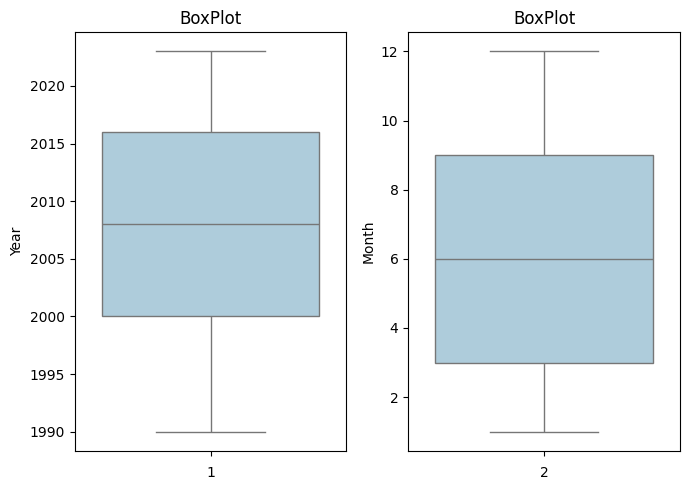

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(7,5))

sns.boxplot(data=df, y='Año', linewidth=1, ax=axes[0])
axes[0].set_title('BoxPlot', fontsize=12)
axes[0].set_xlabel('1', fontsize=10)
axes[0].set_ylabel('Year', fontsize=10)

sns.boxplot(data=df, y='Mes', linewidth=1, ax=axes[1])
axes[1].set_title('BoxPlot', fontsize=12)
axes[1].set_xlabel('2', fontsize=10)
axes[1].set_ylabel('Month', fontsize=10)

#ajustar espacio entre subplots
plt.tight_layout()

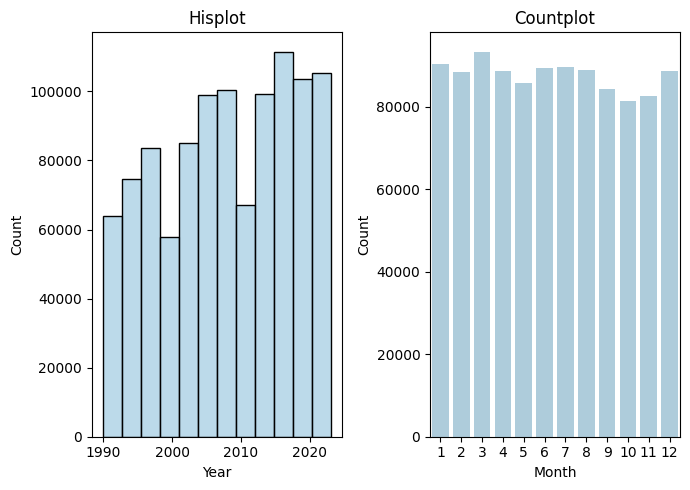

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(7,5))

sns.histplot(data=df, x='Año', bins=12, ax=axes[0])
axes[0].set_title('Hisplot', fontsize=12)
axes[0].set_xlabel('Year', fontsize=10)
axes[0].set_ylabel('Count', fontsize=10)

sns.countplot(data=df, x='Mes', ax=axes[1])
axes[1].set_title('Countplot', fontsize=12)
axes[1].set_xlabel('Month', fontsize=10)
axes[1].set_ylabel('Count', fontsize=10)

#ajustar espacio entre subplots
plt.tight_layout()

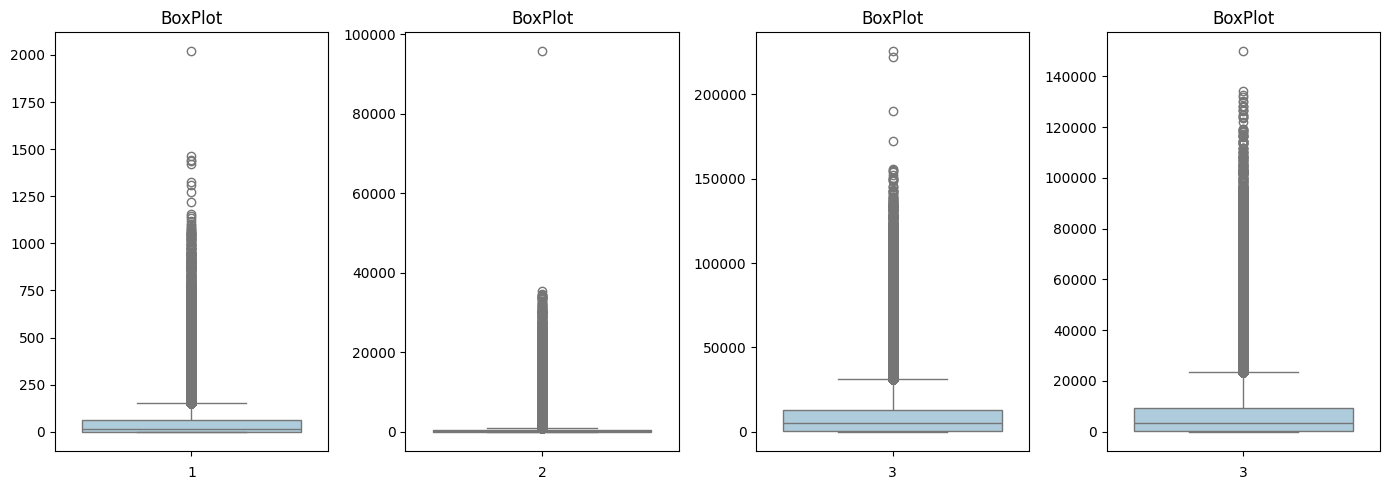

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(14,5))

sns.boxplot(data=df, y='VPasajerosC', linewidth=1, ax=axes[0])
axes[0].set_title('BoxPlot', fontsize=12)
axes[0].set_xlabel('1', fontsize=10)
axes[0].set_ylabel('', fontsize=10)

sns.boxplot(data=df, y='VCargaC', linewidth=1, ax=axes[1])
axes[1].set_title('BoxPlot', fontsize=12)
axes[1].set_xlabel('2', fontsize=10)
axes[1].set_ylabel('', fontsize=10)

sns.boxplot(data=df, y='AsientosC', linewidth=1, ax=axes[2])
axes[2].set_title('BoxPlot', fontsize=12)
axes[2].set_xlabel('3', fontsize=10)
axes[2].set_ylabel('', fontsize=10)

sns.boxplot(data=df, y='PasajerosC', linewidth=1, ax=axes[3])
axes[3].set_title('BoxPlot', fontsize=12)
axes[3].set_xlabel('3', fontsize=10)
axes[3].set_ylabel('', fontsize=10)

#ajustar espacio entre subplots
plt.tight_layout()

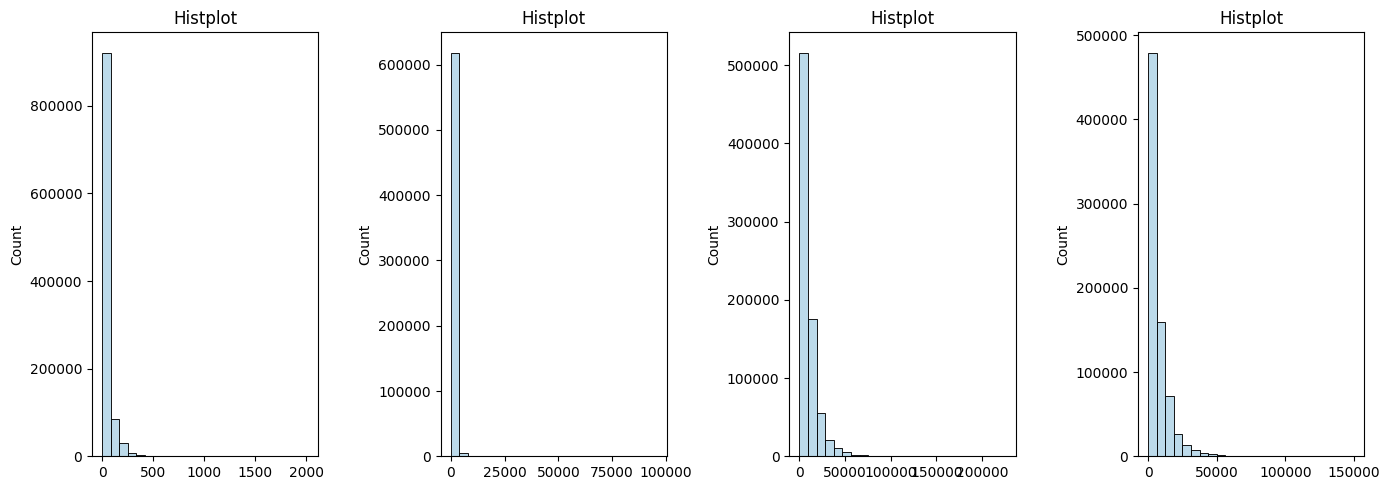

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(14,5))

sns.histplot(data=df, x='VPasajerosC', bins=24, ax=axes[0])
axes[0].set_title('Histplot', fontsize=12)
axes[0].set_xlabel('', fontsize=10)
axes[0].set_ylabel('Count', fontsize=10)

sns.histplot(data=df, x='VCargaC', bins=24, ax=axes[1])
axes[1].set_title('Histplot', fontsize=12)
axes[1].set_xlabel('', fontsize=10)
axes[1].set_ylabel('Count', fontsize=10)

sns.histplot(data=df, x='AsientosC', bins=24, ax=axes[2])
axes[2].set_title('Histplot', fontsize=12)
axes[2].set_xlabel('', fontsize=10)
axes[2].set_ylabel('Count', fontsize=10)

sns.histplot(data=df, x='PasajerosC', bins=24, ax=axes[3])
axes[3].set_title('Histplot', fontsize=12)
axes[3].set_xlabel('', fontsize=10)
axes[3].set_ylabel('Count', fontsize=10)

#ajustar espacio entre subplots
plt.tight_layout()